# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you to find **at least** two datasets on the web which are related, and that you visualize these datasets to answer a question with the broad topic of **weather phenomena** (see below) for the region of **Ann Arbor, Michigan, United States**, or **United States** more broadly.

You can merge these datasets with data from different regions if you like! For instance, you might want to compare **Ann Arbor, Michigan, United States** to Ann Arbor, USA. In that case at least one source file must be about **Ann Arbor, Michigan, United States**.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, bitbucket, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * State the region and the domain category that your data sets are about (e.g., **Ann Arbor, Michigan, United States** and **weather phenomena**).
 * You must state a question about the domain category and region that you identified as being interesting.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

What do we mean by **weather phenomena**?  For this category you might want to consider seasonal changes, natural disasters, or historical trends.

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together for the **Ann Arbor, MI, USA** area using **sports and athletics** as the topic. [Example Solution File](./readonly/Assignment4_example.pdf)

In [1]:
#Library imports

import pandas as pd
import numpy as np
import html5lib
import matplotlib as mpl
import matplotlib.pyplot as plt
import mplcursors
%matplotlib nbagg
import matplotlib.style as style
import seaborn as sns


In [2]:
#Getting URl of Indian states ranked by unemployment, generating DataFrame and cleaning it for further use.

url_unemployment = 'https://simple.wikipedia.org/wiki/Indian_states_ranked_by_unemployment'
df_umemployment = pd.read_html(url_unemployment)

df_unemp = df_umemployment[0]

df_unemp.columns = [x[1] for x in df_unemp.columns]

df_unemp.set_index('State',inplace=True)

df_unemp['Urban_Unemployment'] = df_unemp['Urban']/(df_unemp['Urban']+df_unemp['Rural'])*100
del df_unemp['Rank']
del df_unemp['Total']
del df_unemp['Urban']
del df_unemp['Rural']

df_unemp


,Urban_Unemployment
State,
Tripura,45.866667
Sikkim,47.727273
Delhi,50.199203
Himachal Pradesh,16.428571
Goa,27.884615
Arunachal Pradesh,35.862069
Nagaland,67.142857
Jharkhand,56.287425
Uttar Pradesh,46.853147


In [3]:
#Getting URl of Poverty in India, generating DataFrame and cleaning it for further use.

url_poverty = 'https://en.wikipedia.org/wiki/Poverty_in_India'
df_poverty = pd.read_html(url_poverty)

df_pov = df_poverty[2]

del df_pov['No. of Persons(Thousands) Rural']
del df_pov['% of Persons (Rural)below poverty line']
del df_pov['Poverty line (Rs)/month (Rural)']
del df_pov['No. of Persons(Thousands) Urban']
del df_pov['No. of Persons(Thousands) Combined']
del df_pov['Poverty line (Rs)/month (Urban)']
del df_pov['% of Persons (Combined)below poverty line']

df_pov.set_index('State or Union Territory',inplace=True)

df_pov.rename(columns={'% of Persons (Urban)below poverty line':'BPL_Urban'},inplace=True)

df_pov

,BPL_Urban
State or Union Territory,
Andhra Pradesh,5.81
Arunachal Pradesh,20.33
Assam,30.49
Bihar,31.23
Chhattisgarh,24.75
Goa,4.09
Gujarat,10.14
Haryana,10.28
Himachal Pradesh,4.33


In [4]:
#Getting URl of IList of indian states and union territories by gdp, generating DataFrame and cleaning it for further use.

url_gdp = 'https://en.wikipedia.org/wiki/List_of_Indian_states_and_union_territories_by_GDP'
df_gdp = pd.read_html(url_gdp)

df_gdp = df_gdp[3]

df_gdp['2011–12 in ₹ crore'] = df_gdp['2011–12 in ₹ crore']/10000

del df_gdp['2012–13 in ₹ crore']
del df_gdp['2013–14 in ₹ crore']
del df_gdp['2014–15 in ₹ crore']
del df_gdp['2015–16 in ₹ crore']
del df_gdp['2016–17 in ₹ crore']
del df_gdp['2017–18 in ₹ crore']
del df_gdp['2018–19 in ₹ crore']
del df_gdp['2019–20 in ₹ crore']
del df_gdp['2020–21 in ₹ crore']

df_gdp.set_index('State/union territory',inplace=True)

df_gdp.rename(columns={'2011–12 in ₹ crore':'GDP'},inplace=True)

df_gdp

,GDP
State/union territory,
India,873.6039
Andhra Pradesh,37.9402
Arunachal Pradesh,1.1063
Assam,14.3175
Bihar,24.7144
Chhattisgarh,15.8074
Goa,4.2367
Gujarat,61.5606
Haryana,29.7539


In [5]:
#Getting URl of Demographics of India(for Literacy), generating DataFrame and cleaning it for further use.

url_literacy = 'https://en.wikipedia.org/wiki/Demographics_of_India'
df_literacy = pd.read_html(url_literacy)

df_lit = df_literacy[16]

del df_lit['State or UT code']
del df_lit['Male (%)']
del df_lit['Female (%)']

df_lit.set_index('State or UT',inplace=True)

df_lit.rename(columns={'Overall (%)':'Literacy'},index={'Andhra Pradesh[84]':'Andhra Pradesh'},inplace=True)

df_lit

,Literacy
State or UT,
Jammu and Kashmir,86.61
Himachal Pradesh,83.78
Punjab,86.60
Chandigarh,86.43
Uttarakhand,79.63
Haryana,76.64
Delhi,86.34
Rajasthan,67.06
Uttar Pradesh,69.72


In [12]:
#Merging all 4 DataFrame into 1 and selecting 10 states from 29 states

df_temp = pd.merge(df_unemp, df_pov, left_index=True, right_index=True)

df_temp = pd.merge(df_temp,df_gdp, left_index=True, right_index=True)

df_temp = pd.merge(df_temp, df_lit, left_index=True, right_index=True)

df = df_temp.loc[['Kerala','Gujarat','Rajasthan','West Bengal','Andhra Pradesh','Bihar','Madhya Pradesh','Haryana','Odisha','Tamil Nadu']]

#Sorting value according to literacy
df.sort_values(by=['Literacy'], ascending=False)



,Urban_Unemployment,BPL_Urban,GDP,Literacy
Kerala,41.176471,4.97,36.4048,93.91
Tamil Nadu,44.444444,6.54,75.1486,80.33
Gujarat,59.375000,10.14,61.5606,79.31
West Bengal,54.368932,14.66,52.0485,77.08
Haryana,42.391304,10.28,29.7539,76.64
Odisha,47.959184,17.29,23.0987,72.90
Madhya Pradesh,47.619048,21.00,31.5562,70.63
Andhra Pradesh,53.658537,5.81,37.9402,67.35
Rajasthan,35.833333,10.69,43.4837,67.06
Bihar,55.639098,31.23,24.7144,63.82


<IPython.core.display.Javascript object>


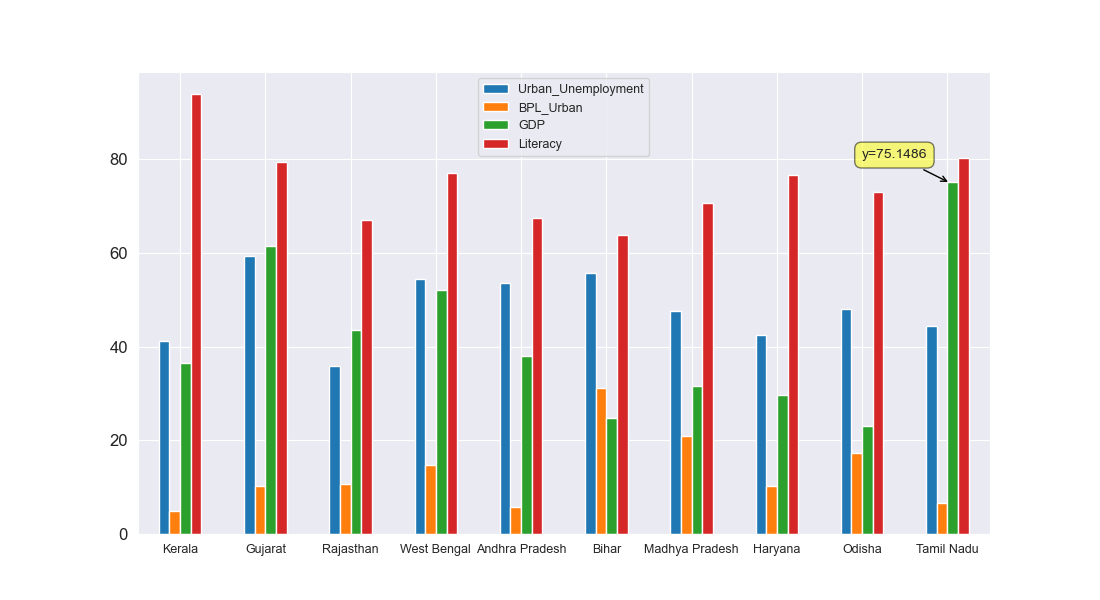

In [19]:
#Using seaborn darkgrid style
sns.set_style("darkgrid")

#Generating plot and formatting it.
fig = plt.figure(figsize=(11,6))

df.plot(kind='bar',ax=plt.gca())
plt.xticks(rotation=360,fontsize=9)
plt.legend(loc='upper center',fontsize=9)
plt.yticks(fontsize=12)

#Using mplcursors for interactive hovering.
mplcursors.cursor(hover=True)